# <span style="color: blue;">Projeto de Análise de Dados - People Analytics</span>

### <span style="color: blue;">Foco em Análise Exploratória e Tratamento dos dados</span>

## Objetivos:
- Empresa de Tecnologia sediada na cidade de São Paulo, que além de desenvolver Sistemas e Aplicativos, também promove treinamentos para o publico da Grande SP com a finalidade de atrair novos talentos para seu quadro de colaboradores.
- Ela colheu dados históricos, de aproximadamente 19 mil alunos, para análise e verificar o motivo pelos quais muitos responderam que não estavam dispostos a trocar de emprego.
- Elaborar análise e explicar os possíveis motivos.

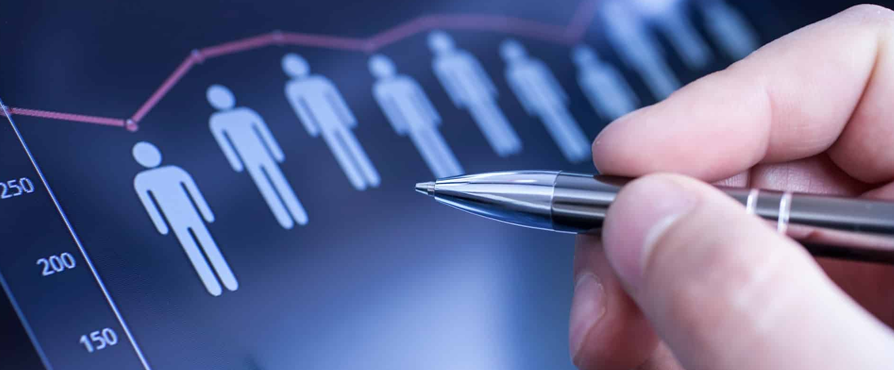

In [1]:
from IPython.display import Image
Image('dados/rh.png')

In [2]:
# Versão da linguagem python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [59]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# importar os módulos de sistema
import math
import sys, os

# Configurar a quantidade de colunas que fica visível em consulta
pd.set_option('display.max_columns', 100)

# Modulos especiais para tratamento de dados
sys.path.append(os.path.abspath(os.path.join('00')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *
import estrategia4

## Carregando os dados

In [9]:
# importar csv
df = pd.read_csv('dados/dados.csv', encoding='utf8', sep=',')

In [10]:
# shape
df.shape

(19158, 14)

In [11]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_candidato              19158 non-null  int64  
 1   cidade                    19158 non-null  object 
 2   idh_cidade                19158 non-null  float64
 3   genero                    14650 non-null  object 
 4   experiencia_relevante     19158 non-null  object 
 5   matriculado_universidade  18772 non-null  object 
 6   escolaridade              18698 non-null  object 
 7   atuacao                   16345 non-null  object 
 8   experiencia_anos          19093 non-null  object 
 9   funcionarios_empresa      13220 non-null  object 
 10  tipo_empresa              13018 non-null  object 
 11  dif_anos_novo_emprego     18735 non-null  object 
 12  treinamento_horas         19158 non-null  int64  
 13  procura_emprego           19158 non-null  object 
dtypes: flo

In [12]:
# colunas
list(df.columns)

['id_candidato',
 'cidade',
 'idh_cidade',
 'genero',
 'experiencia_relevante',
 'matriculado_universidade',
 'escolaridade',
 'atuacao',
 'experiencia_anos',
 'funcionarios_empresa',
 'tipo_empresa',
 'dif_anos_novo_emprego',
 'treinamento_horas',
 'procura_emprego']

In [13]:
# amostra
df.head()

,id_candidato,cidade,idh_cidade,genero,experiencia_relevante,matriculado_universidade,escolaridade,atuacao,experiencia_anos,funcionarios_empresa,tipo_empresa,dif_anos_novo_emprego,treinamento_horas,procura_emprego
0,8949,São Paulo,0.805,Masculino,Com relevancia,Não matriculado,Superior,Exatas,>20,NaN,NaN,1,36,sim
1,29725,Diadema,0.758,Masculino,Sem relevancia,Não matriculado,Superior,Exatas,15,50-99,Ltda,>4,47,não
2,11561,Osasco,0.769,NaN,Sem relevancia,Em tempo integral,Superior,Exatas,5,NaN,NaN,sem anterior,83,não
3,33241,Barueri,0.763,NaN,Sem relevancia,NaN,Superior,Negócios,<1,NaN,Ltda,sem anterior,52,sim
4,666,Mauá,0.747,Masculino,Com relevancia,Não matriculado,Mestrado,Exatas,>20,50-99,Startup,4,8,não


## Análise exploratória

In [14]:
# apagar a coluna de id
df = df.drop('id_candidato', axis=1)

### Variável de estudo

In [27]:
target = df['procura_emprego']

In [28]:
# proporção qtd
target.value_counts()

não    14381
sim     4777
Name: procura_emprego, dtype: int64

In [29]:
# proporção %
round(target.value_counts(normalize=True)*100,1)

não    75.1
sim    24.9
Name: procura_emprego, dtype: float64

In [60]:
# entender valores ausentes
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 15 colunas.
Encontrado: 8 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
tipo_empresa,6140,32.05,object
funcionarios_empresa,5938,30.99,object
genero,4508,23.53,object
atuacao,2813,14.68,object
escolaridade,460,2.40,object
dif_anos_novo_emprego,423,2.21,object
matriculado_universidade,386,2.01,object
experiencia_anos,65,0.34,object


In [61]:
categoricas = ['cidade',
 'genero',
 'experiencia_relevante',
 'matriculado_universidade',
 'escolaridade',
 'atuacao',
 'experiencia_anos',
 'funcionarios_empresa',
 'tipo_empresa',
 'dif_anos_novo_emprego']

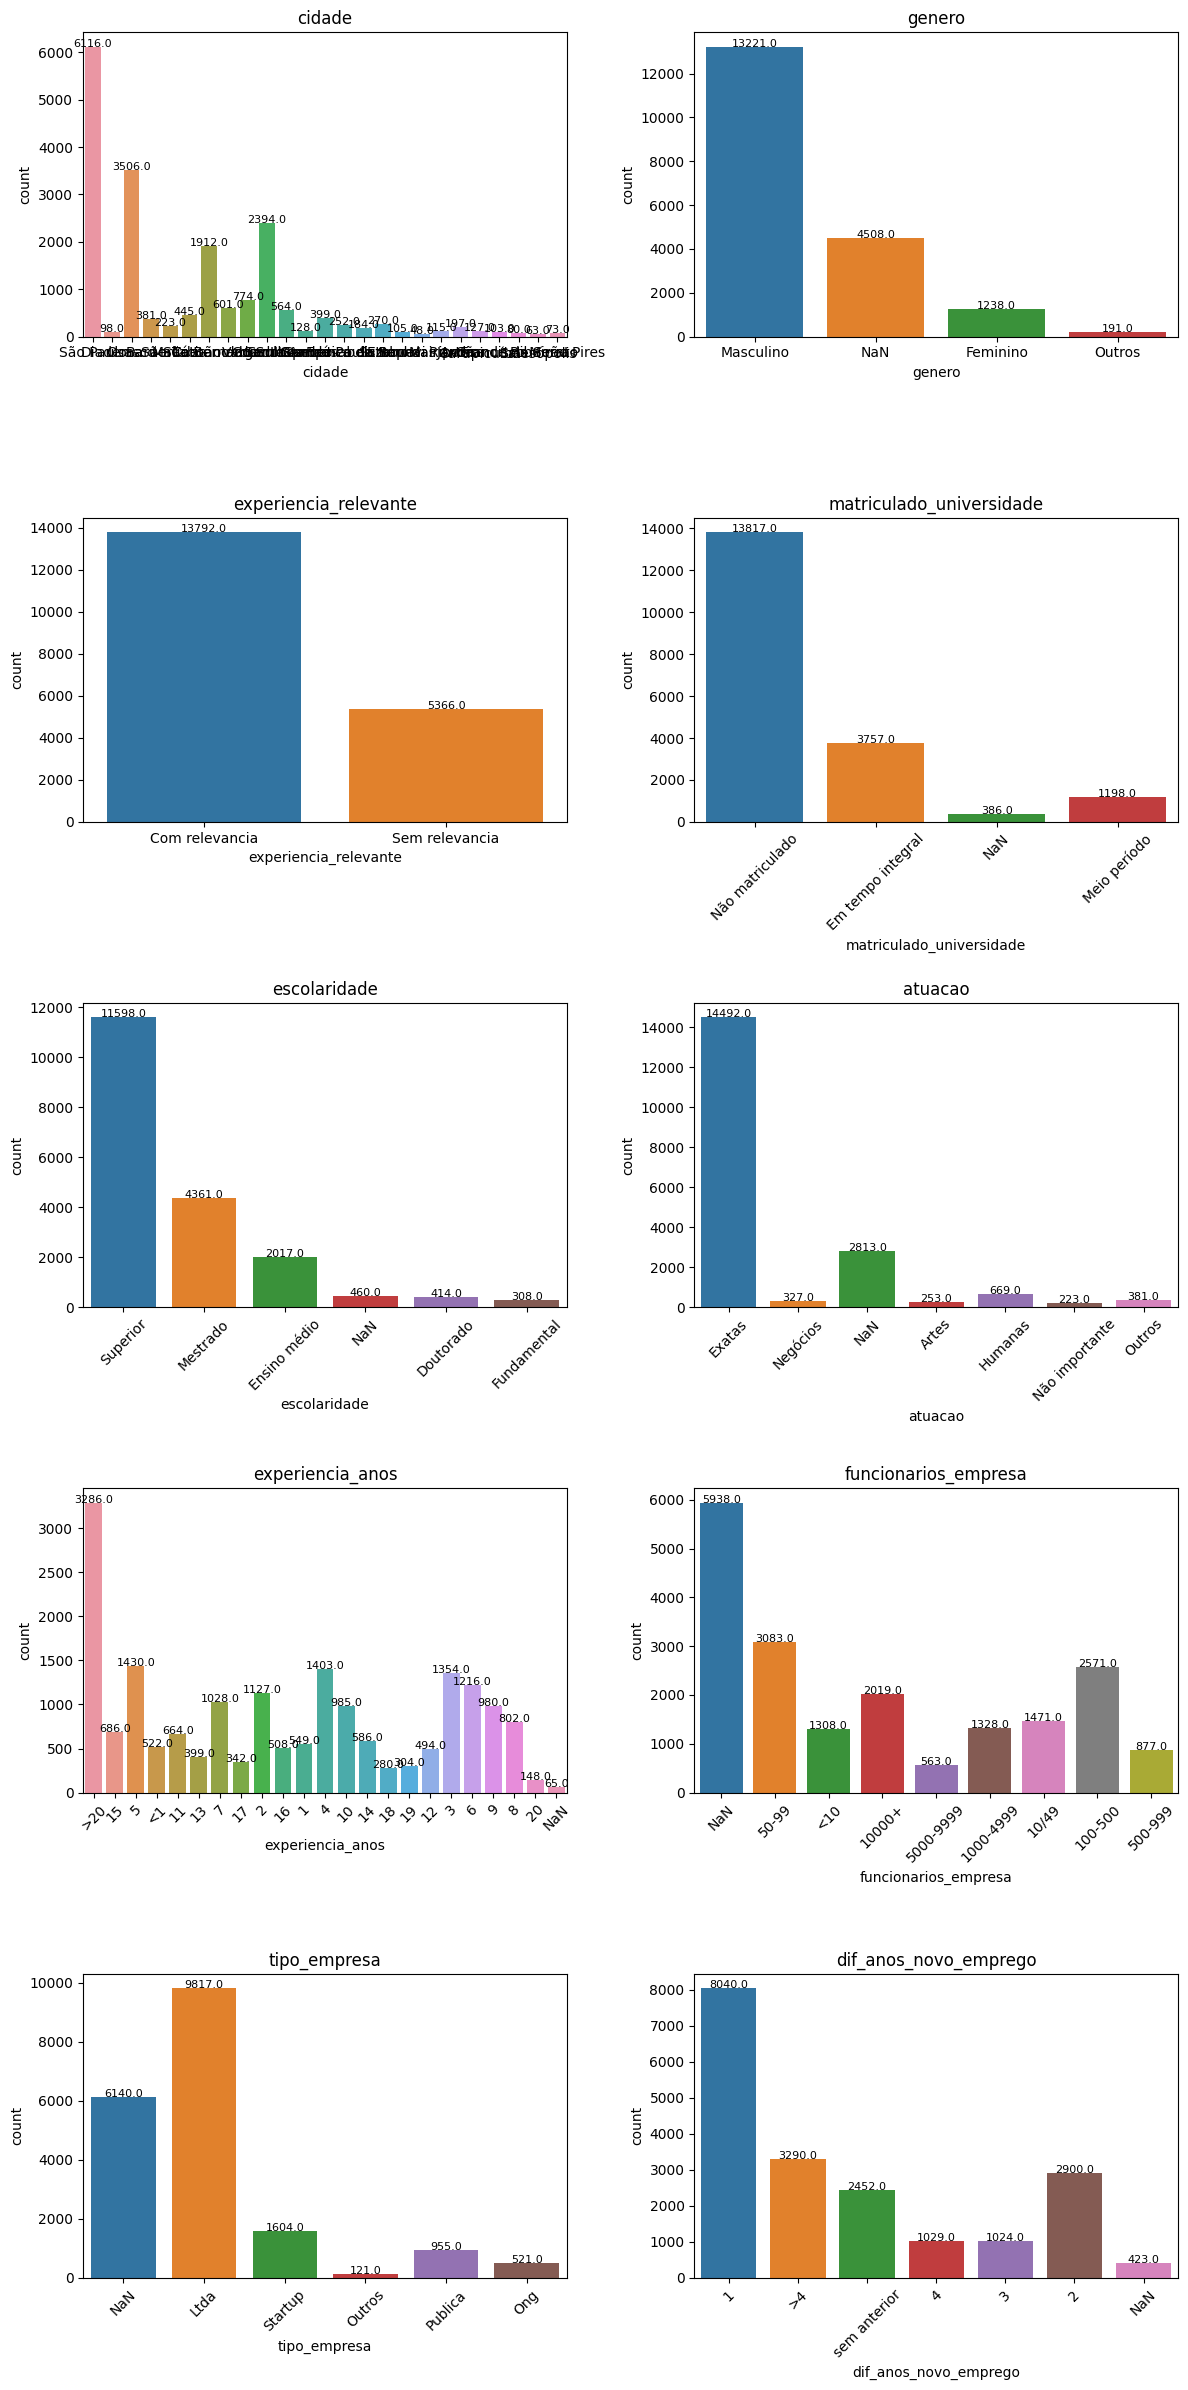

In [66]:
### Gráficos para contagem de registros de colunas categóricas

# tamanho da figura
plt.figure(figsize = (12,24))

# Contador
A = 0

# Loop
for i in categoricas:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 12)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 8)
    if A >= 4:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

In [67]:
# Criando tabelas de frequências
# iterando sobre as colunas categóricas do dataframe
for coluna in categoricas:
    # criando a tabela de frequência para a coluna atual
    freq_table = pd.DataFrame({'Freq. Absoluta': df[coluna].value_counts(dropna=False).fillna('NA'),
                               'Freq. Relativa': (df[coluna].value_counts(normalize=True, dropna=False) * 100).fillna('NA').round(1),
                               'Freq. Acumulada': (df[coluna].value_counts(normalize=True, dropna=False).cumsum() * 100).fillna('NA').round(1)})
    
    # imprimindo a tabela de frequência
    print(f'Tabela de Frequência - variável: {coluna}\n{"-"*70}\n{freq_table}\n{"-"*70}\n\n')

Tabela de Frequência - variável: cidade
----------------------------------------------------------------------
                        Freq. Absoluta  Freq. Relativa  Freq. Acumulada
São Paulo                         6116            31.9             31.9
Osasco                            3506            18.3             50.2
Guarulhos                         2394            12.5             62.7
São Caetano do Sul                1912            10.0             72.7
São Bernardo do Campo              774             4.0             76.7
Taboão da Serra                    601             3.1             79.9
Santo André                        564             2.9             82.8
Cotia                              445             2.3             85.1
Santa Isabel                       399             2.1             87.2
Barueri                            381             2.0             89.2
Suzano                             270             1.4             90.6
Itapecerica da Serra     